<a href="https://colab.research.google.com/github/fahim-fattah/Competition-Code-s/blob/main/S5_E5_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [3]:
for i in [train,test]:
  print(i.head())
  print(i.shape)

   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0
(750000, 9)
       id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  750000    male   45   177.0    81.0       7.0        87.0       39.8
1  750001    male   26   200.0    97.0      20.0       101.0       40.5
2  750002  female   29   188.0    85.0      16.0       102.0       40.4
3  750003  female   39   172.0    73.0      20.0       107.0       40.6
4  750004  female   30   173.0    67.0      16.0        94.0       40.5
(250000, 8)


In [4]:
features_train=train.drop(['id','Calories'],axis=1)
target=train['Calories']
features_test=test.drop(['id'],axis=1)

In [5]:
for i in [features_train,features_test,target]:
  print(i.shape)

(750000, 7)
(250000, 7)
(750000,)


## EDA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew

### info & description

In [7]:
for i in [features_train,features_test]:
  print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 40.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         250000 non-null  object 
 1   Age         250000 non-null  int64  
 2   Height      250000 non-null  float64
 3   Weight      250000 non-null  float64
 4   Duration    250000 non-null  float64
 5   Heart_Rate  250000 non-null  float6

In [8]:
features_train['Sex']=features_train['Sex'].map({'male':1,'female':0})
features_test['Sex']=features_test['Sex'].map({'male':1,'female':0})

In [9]:
for i in [features_train,features_test]:
  print(i.head(2))

   Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0    1   36   189.0    82.0      26.0       101.0       41.0
1    0   64   163.0    60.0       8.0        85.0       39.7
   Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0    1   45   177.0    81.0       7.0        87.0       39.8
1    1   26   200.0    97.0      20.0       101.0       40.5


In [10]:
features_train.describe()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,0.499039,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253
std,0.499999,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000
25%,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,0.000000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000
75%,1.000000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000
max,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


### Null handling

In [11]:
for i in [features_train,features_test]:
  print(i.isnull().sum())

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64


In [12]:
target.isnull().sum()

np.int64(0)

### Outlier handling

#### checking

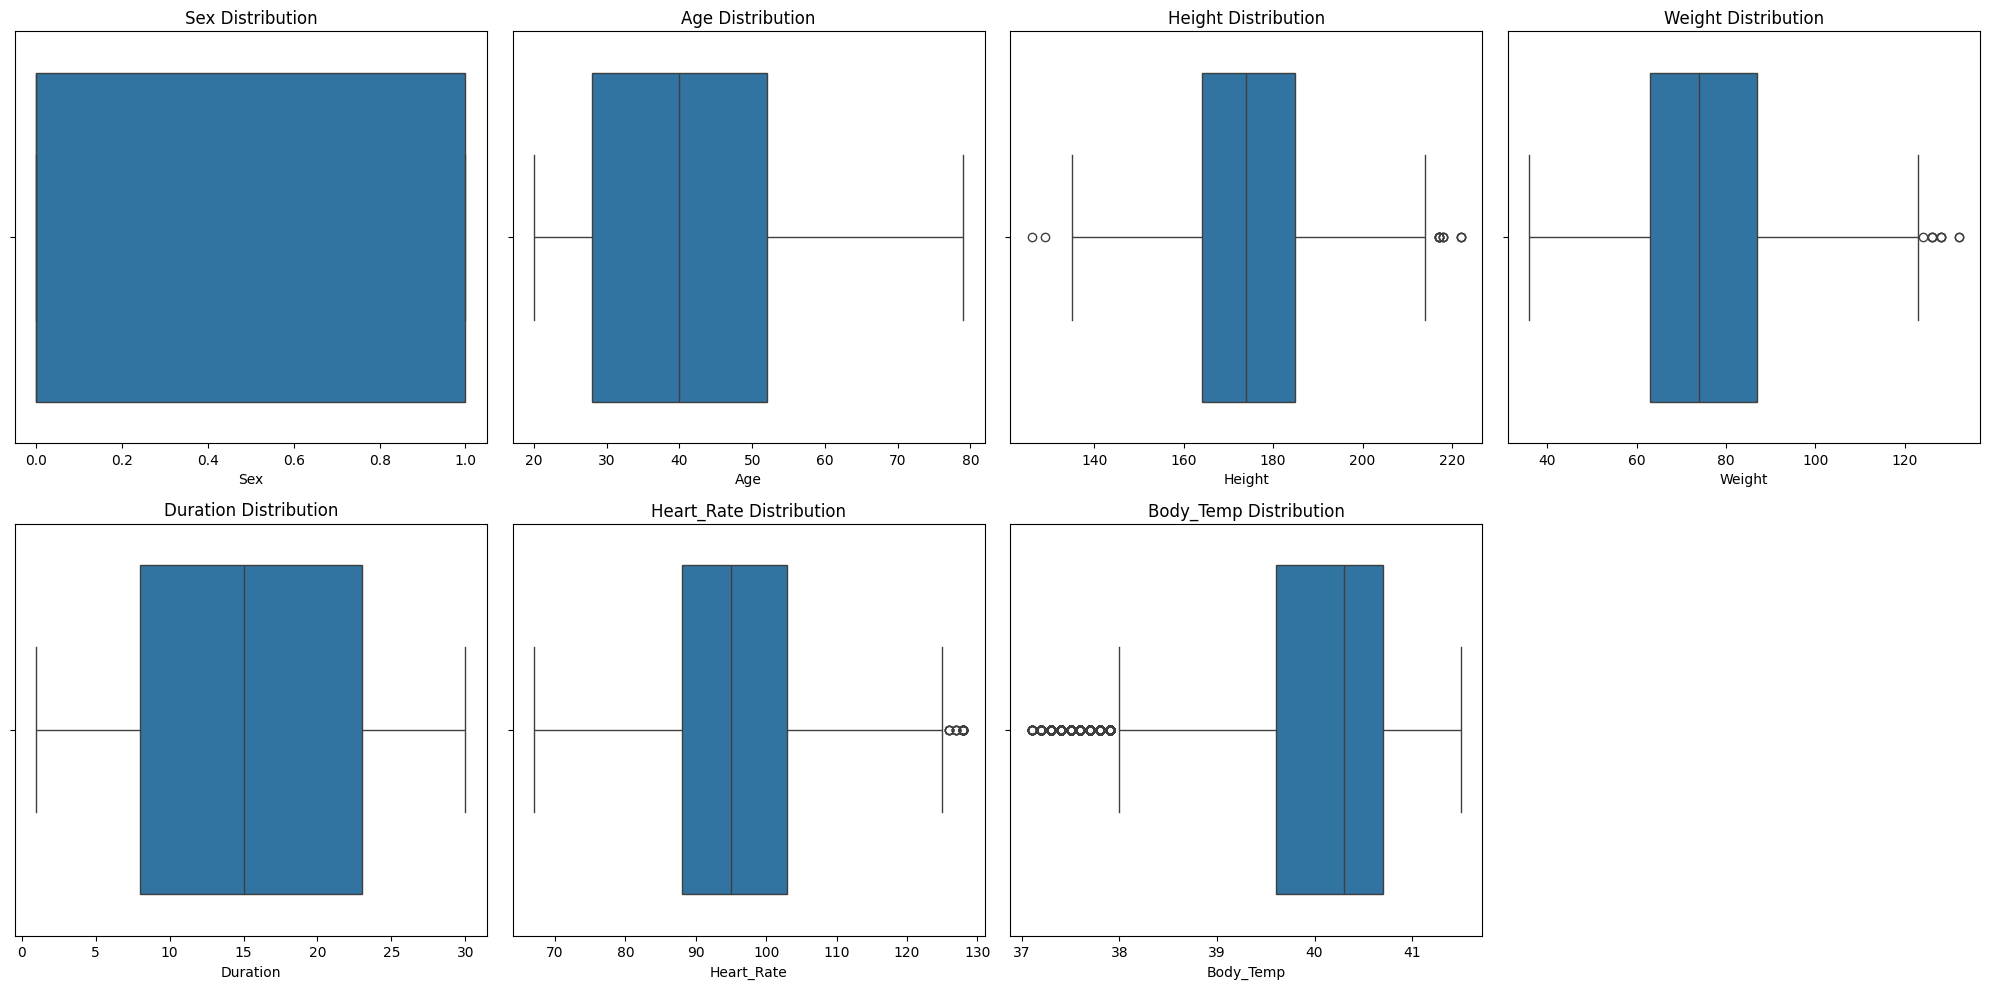

In [13]:
cols=4
n=features_train.shape[1]
rows = (n+cols-1)//cols
plt.figure(figsize=(20,5*rows))
for i,col in enumerate(features_train.columns):
  plt.subplot(rows,cols,i+1)
  sns.boxplot(x=features_train[col])
  plt.title(f"{col} Distribution")
  plt.tight_layout()

#### finding

In [14]:
Q1=features_train['Height'].quantile(0.25)
Q3=features_train['Height'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
out_1=features_train[(features_train['Height']<lower_bound) | (features_train['Height']>upper_bound)]
out_1.shape

(14, 7)

In [15]:
Q1=features_train['Weight'].quantile(0.25)
Q3=features_train['Weight'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
out_2=features_train[(features_train['Weight']<lower_bound) | (features_train['Weight']>upper_bound)]
out_2.shape

(9, 7)

In [16]:
Q1=features_train['Heart_Rate'].quantile(0.25)
Q3=features_train['Heart_Rate'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
out_3=features_train[(features_train['Heart_Rate']<lower_bound) | (features_train['Heart_Rate']>upper_bound)]
out_3.shape

(36, 7)

In [17]:
Q1=features_train['Body_Temp'].quantile(0.25)
Q3=features_train['Body_Temp'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
out_3=features_train[(features_train['Body_Temp']<lower_bound) | (features_train['Body_Temp']>upper_bound)]
out_3.shape

(14919, 7)

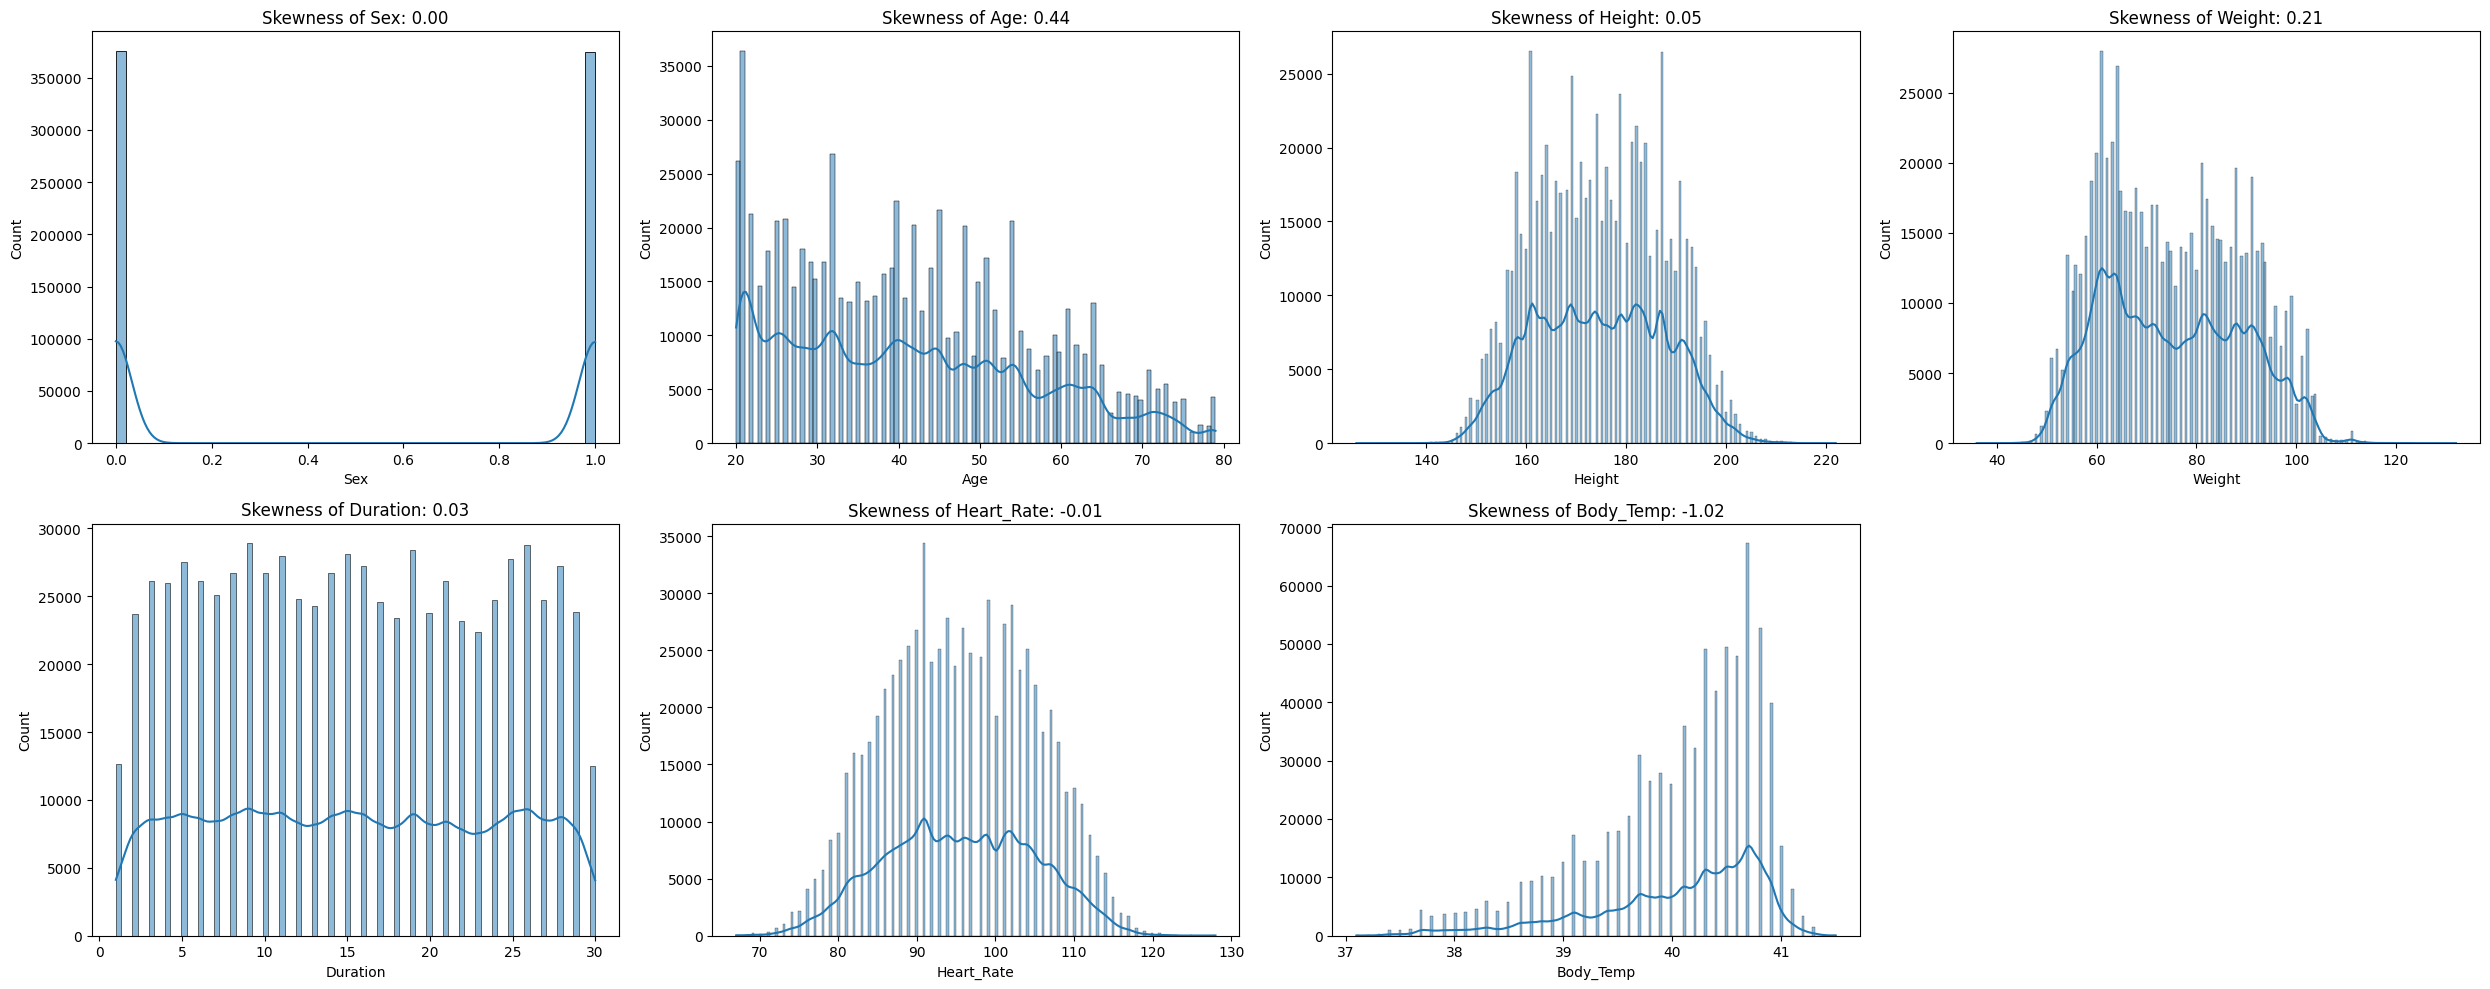

In [18]:
cols=4
n=features_train.shape[1]
rows = (n+cols-1)//cols
plt.figure(figsize=(25,5*rows))
for i,col in enumerate(features_train.columns):
  sk=skew(features_train[col])
  plt.subplot(rows,cols,i+1)
  sns.histplot(features_train[col],kde=True)
  plt.title(f"Skewness of {col}: {sk:.2f}")
  plt.tight_layout()

Skewness of Body_Temp: -1.02


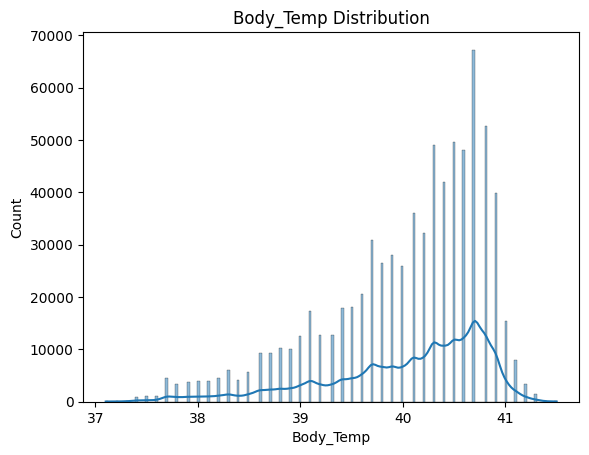

In [19]:
# Body temperatrue distribution is left skewed !!!
sk = skew(features_train['Body_Temp'])
print(f"Skewness of Body_Temp: {sk:.2f}")
sns.histplot(features_train['Body_Temp'], kde=True)
plt.title("Body_Temp Distribution")
plt.show()

In [20]:
### We use the treee model.. so initially keep it as it is .

### Corelation

In [21]:
features_train.corrwith(target)

,0
Sex,0.012011
Age,0.145683
Height,-0.004026
Weight,0.015863
Duration,0.959908
Heart_Rate,0.908748
Body_Temp,0.828671


In [31]:
df=pd.concat([features_train,target],axis=1)

<Axes: >

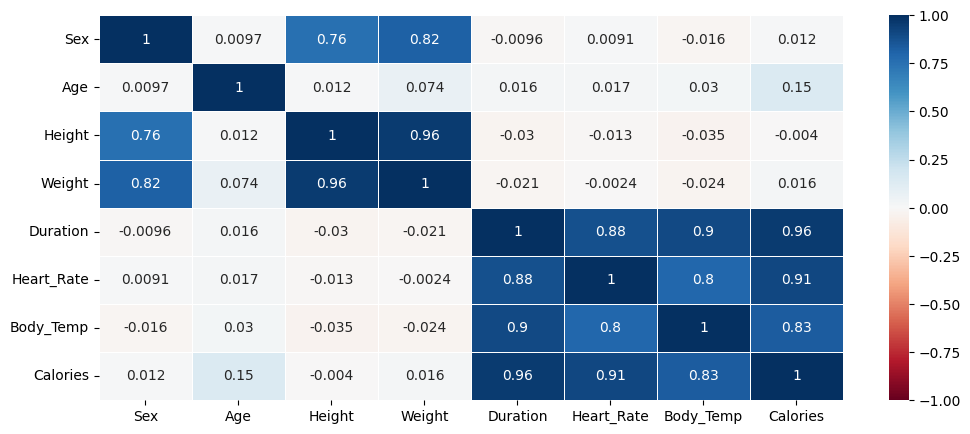

In [32]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap='RdBu', linewidths=0.5,vmax=1,vmin=-1)

### Pairplot

<Figure size 1200x500 with 0 Axes>

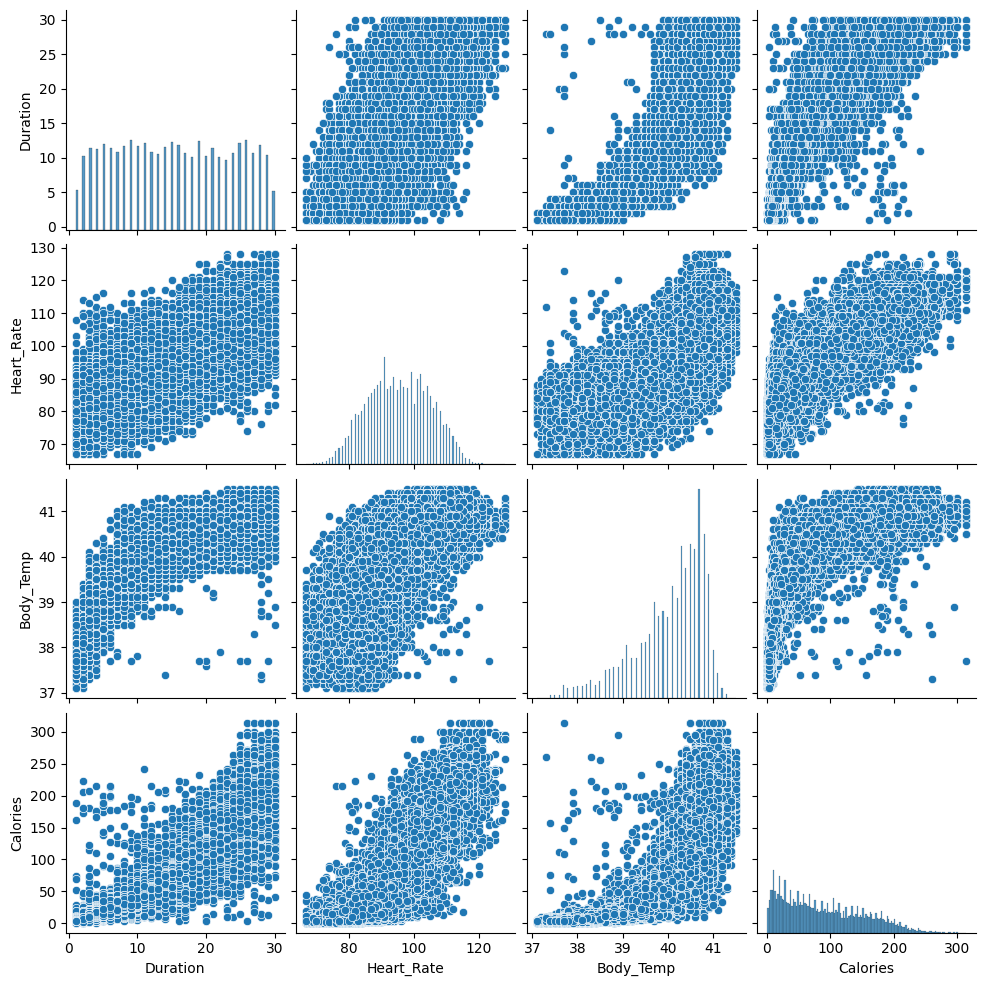

In [33]:
plt.figure(figsize=(12,5))
sns.pairplot(df[['Duration', 'Heart_Rate', 'Body_Temp', 'Calories']])

### relation with calorie . according to sex

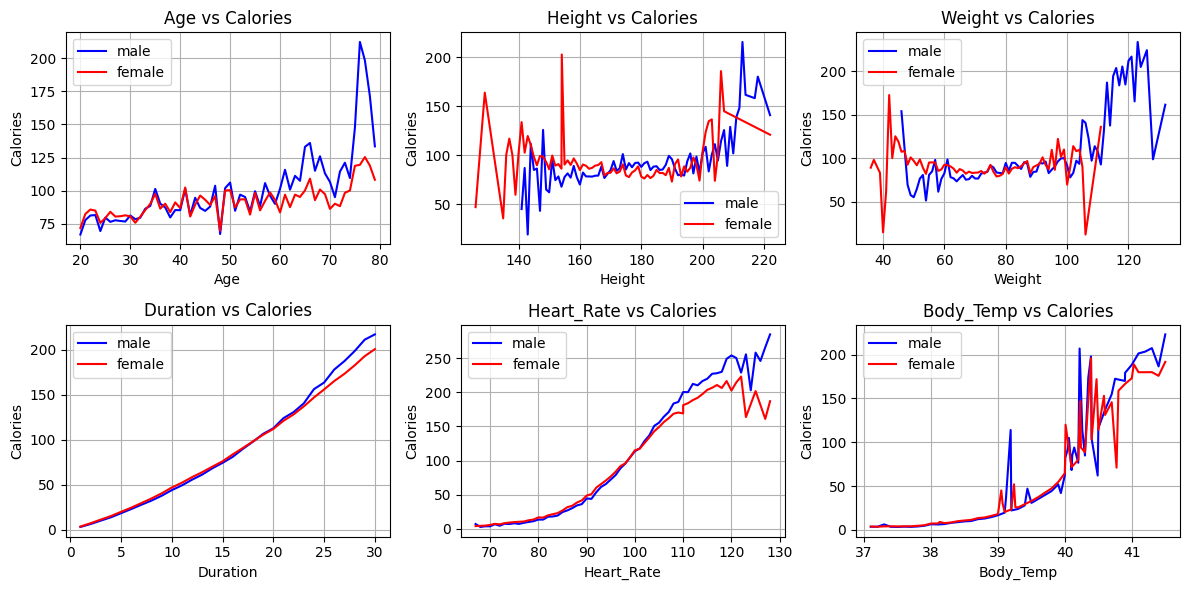

In [42]:

# Features to plot
features = features_train.drop('Sex',axis=1)

# Subplot layout
cols = 3
n=features.shape[1]
rows = (n+cols-1)//cols
plt.figure(figsize=(12, 3 * rows))

# Loop to plot each feature vs Calories, grouped by Sex
for i, col in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    # Male line
    male_df = df[df['Sex'] == 1]
    male_group = male_df.groupby(col)['Calories'].mean().sort_index()
    plt.plot(male_group.index, male_group.values, label='male', color='blue')
    # Female line
    female_df = df[df['Sex'] == 0]
    female_group = female_df.groupby(col)['Calories'].mean().sort_index()
    plt.plot(female_group.index, female_group.values, label='female', color='red')
    # Formatting
    plt.title(f'{col} vs Calories')
    plt.xlabel(col)
    plt.ylabel('Calories')
    plt.legend()
    plt.grid(True)

plt.tight_layout()



,Calories
Body_Temp,
37.1,3.500000
37.2,3.511111
37.3,6.204545
37.4,3.437282
37.5,3.290023
...,...
41.1,201.424982
41.2,203.458835
41.3,207.467933


## Feature Eng.

## Model Building

In [63]:
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_log_error,mean_squared_log_error
from sklearn.model_selection import cross_val_score


### Random

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
model4=RandomForestRegressor()
model4.fit(features_train,target)
mean_squared_error(target,model4.predict(features_train)),cross_val_score(estimator=model4,cv=4,X=features_train,y=target,scoring='neg_mean_squared_error').mean()

(2.0734639157484827, np.float64(-14.80545607927062))

In [64]:
root_mean_squared_log_error(target,model4.predict(features_train)),cross_val_score(estimator=model4,cv=4,X=features_train,y=target,scoring='neg_root_mean_squared_log_error').mean()

(0.02527649372747193, np.float64(-0.0640931146725462))

### xgb

In [43]:
from xgboost import XGBRegressor

In [46]:
model1 = XGBRegressor()
model1.fit(features_train,target)
mean_squared_error(target,model1.predict(features_train)),cross_val_score(estimator=model1,cv=4,X=features_train,y=target,scoring='neg_mean_squared_error').mean()


(12.81520724777441, np.float64(-14.52496977039552))

In [65]:
root_mean_squared_log_error(target,model1.predict(features_train)),cross_val_score(estimator=model1,cv=4,X=features_train,y=target,scoring='neg_root_mean_squared_log_error').mean()

(0.06290641249701048, np.float64(-0.06532887385957392))

In [74]:
mean_squared_log_error(target,model1.predict(features_train))

0.003957216733244037

### cat

In [50]:
from catboost import CatBoostRegressor

In [53]:
model2 = CatBoostRegressor(logging_level='Silent')
model2.fit(features_train,target)
mean_squared_error(target,model2.predict(features_train)),cross_val_score(estimator=model2,cv=4,X=features_train,y=target,scoring='neg_mean_squared_error').mean()


(11.253306969132584, np.float64(-12.77906456962719))

In [66]:
root_mean_squared_log_error(target,model2.predict(features_train)),cross_val_score(estimator=model2,cv=4,X=features_train,y=target,scoring='neg_root_mean_squared_log_error').mean()

(0.0597661422552368, np.float64(-0.061761853974839326))

In [73]:
mean_squared_log_error(target,model2.predict(features_train))

0.003571991760073202

### light

In [54]:
from lightgbm import LGBMRegressor

In [56]:
model3=LGBMRegressor(verbose=-1)
model3.fit(features_train,target)
mean_squared_error(target,model3.predict(features_train)),cross_val_score(estimator=model3,cv=4,X=features_train,y=target,scoring='neg_mean_squared_error').mean()

(14.191996757301972, np.float64(-14.688035810211485))

In [67]:
root_mean_squared_log_error(target,model3.predict(features_train)),cross_val_score(estimator=model3,cv=4,X=features_train,y=target,scoring='neg_root_mean_squared_log_error').mean()

(0.06905663763902278, np.float64(-0.07107228570067677))

## Submission

In [75]:
## XGB
sm=pd.read_csv('/content/test.csv')
sub = pd.DataFrame({"id": sm.id, "Calories": list(model1.predict(features_test))})
sub.to_csv("submission2.csv", index=False)
sub.head()

,id,Calories
0,750000,26.481358
1,750001,106.400833
2,750002,85.598892
3,750003,126.845436
4,750004,75.677055


In [78]:
submission2=pd.read_csv('/content/submission2.csv')

In [80]:
assert (submission2['Calories'] >= 0).all(), "Submission contains negative values!"


AssertionError: Submission contains negative values!

In [82]:
num_negatives = (submission2['Calories'] < 0).sum()
print(f"Number of negative predictions: {num_negatives}")


Number of negative predictions: 1


In [84]:
submission2['Calories'] = submission2['Calories'].clip(lower=0)


In [85]:
submission2.to_csv("submission6.csv", index=False)

In [69]:
## cat
sm=pd.read_csv('/content/test.csv')
sub = pd.DataFrame({"id": sm.id, "Calories": list(model2.predict(features_test))})
sub.to_csv("submission3.csv", index=False)
sub.head()

,id,Calories
0,750000,26.686808
1,750001,108.145284
2,750002,86.521653
3,750003,125.750076
4,750004,76.753812


In [71]:
## lg
sm=pd.read_csv('/content/test.csv')
sub = pd.DataFrame({"id": sm.id, "Calories": list(model3.predict(features_test))})
sub.to_csv("submission4.csv", index=False)
sub.head()

,id,Calories
0,750000,27.035663
1,750001,109.114853
2,750002,88.796757
3,750003,128.235027
4,750004,74.265036


In [72]:
## random
sm=pd.read_csv('/content/test.csv')
sub = pd.DataFrame({"id": sm.id, "Calories": list(model4.predict(features_test))})
sub.to_csv("submission5.csv", index=False)
sub.head()

,id,Calories
0,750000,27.03
1,750001,106.35
2,750002,87.20
3,750003,127.17
4,750004,76.00


In [86]:
## Best model is model 2 . ( sub 3 )

In [87]:
## Cat worked well . without any tuning or feature engineering